In [77]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [78]:
dataframe = pandas.read_csv("cap.csv", delim_whitespace=True, header=None)
dataset = dataframe.values

In [79]:
data_mean = np.mean(dataset, axis=0)
data_std  = np.std(dataset, axis=0)

In [80]:
data_mean = np.mean(dataset, axis=0)
data_std  = np.std(dataset, axis=0)

def normalize(d, mean, std):
    return (d - mean) / std

dataset = normalize(dataset, data_mean, data_std)
np.random.shuffle(dataset)

In [81]:
X = dataset[:,0:3]
Y = dataset[:,3]

In [82]:
data = np.array(X,dtype=float)
target = np.array(Y,dtype=float)

In [83]:
data.shape

(10000, 3)

In [84]:
target.shape

(10000,)

In [85]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.02,random_state=4)

In [86]:
x_train.shape

(9800, 3)

In [101]:
x_test.shape

(200, 3)

In [88]:
y_train.shape

(9800,)

In [89]:
y_test.shape

(200,)

In [91]:
model=Sequential()

model.add(Dense(15,input_shape=(3,)))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(10))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(1))
model.add(LeakyReLU(alpha=0.05))
model.compile(optimizer='SGD',loss='mse',metrics=['acc'])

In [92]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 15)                60        
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 15)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                160       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 10)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 1)                 0         
Total params: 231
Trainable params: 231
Non-trainable params: 0
________________________________________________________

In [93]:
history=model.fit(x_train,y_train, epochs=100,validation_data=(x_test, y_test))

Train on 9800 samples, validate on 200 samples
Epoch 1/100
9800/9800 [==============================] - 1s 66us/step - loss: 0.5437 - acc: 0.0000e+00 - val_loss: 0.3852 - val_acc: 0.0000e+00
Epoch 2/100
9800/9800 [==============================] - 1s 55us/step - loss: 0.4232 - acc: 0.0000e+00 - val_loss: 0.3657 - val_acc: 0.0000e+00
Epoch 3/100
9800/9800 [==============================] - 1s 54us/step - loss: 0.4026 - acc: 0.0000e+00 - val_loss: 0.3440 - val_acc: 0.0000e+00
Epoch 4/100
9800/9800 [==============================] - 1s 56us/step - loss: 0.3742 - acc: 0.0000e+00 - val_loss: 0.3123 - val_acc: 0.0000e+00
Epoch 5/100
9800/9800 [==============================] - 1s 54us/step - loss: 0.3288 - acc: 0.0000e+00 - val_loss: 0.2611 - val_acc: 0.0000e+00
Epoch 6/100
9800/9800 [==============================] - 1s 53us/step - loss: 0.2557 - acc: 0.0000e+00 - val_loss: 0.1821 - val_acc: 0.0000e+00
Epoch 7/100
9800/9800 [==============================] - 1s 54us/step - loss: 0.1575 - ac

In [95]:
results = model.predict(x_test)

In [96]:
results.shape

(200, 1)

In [97]:
y_test.shape

(200,)

In [98]:
results.size==y_test.size

True

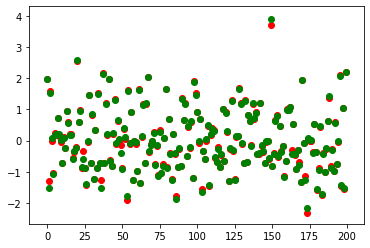

In [99]:
plt.scatter(range(200),results,c='r')
plt.scatter(range(200),y_test,c='g')
plt.show()

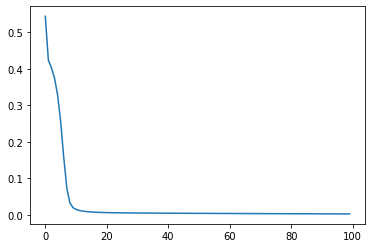

In [100]:
plt.plot(history.history['loss'])
plt.show()